In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import pandas as pd
import numpy as np

train_data=pd.read_csv('../input/digit-recognizer/train.csv')

test_data=pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
classes=train_data['label']
x_train=train_data.drop('label',axis=1)
labels=classes.nunique()

In [6]:
x_train=x_train.values
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_train/=255



In [7]:
x_test=test_data
x_test=x_test.values
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_test=x_test.astype('float32')
x_test/=255

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,classes,test_size=0.2,random_state=100)
x_train.shape,x_val.shape


((33600, 28, 28, 1), (8400, 28, 28, 1))

In [9]:
import tensorflow
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import RMSprop ,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [10]:
num_classes=labels
img_rows,img_cols=28,28
batch_size=20

In [11]:
import tensorflow as tf
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(50,activation=tf.nn.relu))
model.add(Dense(num_classes,activation=tf.nn.softmax))

2022-09-14 00:15:17.353941: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:

model.fit(x=x_train,y=y_train,epochs=10,
         validation_data=(x_val,y_val))

2022-09-14 00:15:17.721567: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.2758 - accuracy: 0.9190 - val_loss: 0.1120 - val_accuracy: 0.9642
Epoch 2/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.1044 - accuracy: 0.9665 - val_loss: 0.0915 - val_accuracy: 0.9730
Epoch 3/10
1050/1050 [==============================] - 8s 7ms/step - loss: 0.0719 - accuracy: 0.9770 - val_loss: 0.0860 - val_accuracy: 0.9740
Epoch 4/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0525 - accuracy: 0.9827 - val_loss: 0.0782 - val_accuracy: 0.9789
Epoch 5/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0456 - accuracy: 0.9848 - val_loss: 0.0764 - val_accuracy: 0.9792
Epoch 6/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0339 - accuracy: 0.9883 - val_loss: 0.0924 - val_accuracy: 0.9760
Epoch 7/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0316 - accuracy: 0.9887 - val_loss: 0.0860 - val_accuracy:

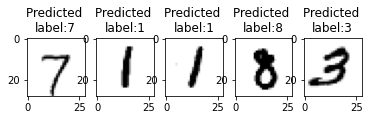

In [14]:
import matplotlib.pyplot as plt
row=1
cols=5
for i in range(1,6):
    image_index = np.random.randint(1,28000)
    plt.subplot(row,cols,i)
    plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
    predict = x_test[image_index].reshape(28,28)
    pred = model.predict(x_test[image_index].reshape(1,28, 28, 1))
    plt.title(f'Predicted \nlabel:{pred.argmax()}')

In [15]:
final_results=np.argmax(model.predict(x_test),axis=1)

In [16]:
submission_file=pd.DataFrame({'ImageId':test_data.index+1,'Label':final_results})
submission_file

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [17]:
submission_file.to_csv('submission.csv',index=False)
